In [12]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../data/LIDC_20130817_AllFeatures2D_MaxSlicePerNodule_inLineRatings.csv")

In [4]:
features = df.loc[:, "subtlety":"malignancy"]

In [5]:
# group into benign, indeterminate, and malignant
features["3mal"] = list(map(lambda m: 0 if m < 3 else 1 if m == 3 else 2, df["malignancy"].values))

# binary malignancy
features["2mal"] = list(map(lambda m: 0 if m < 3 else 1 if m > 3 else np.nan, df["malignancy"].values))

# malignancy 1-2 and 4-5 only
features["mal_drop3"] = list(map(lambda m: m if m != 3 else np.nan, df["malignancy"].values))

In [71]:
counts = [[[sum((features[feature] == val).values & (features["3mal"] == mal)) / sum((features[feature] == val).values)
            for mal in [2,1,0]]
            for val in [1,2,3,4,5]]
            for feature in features.columns]

C:\Users\efurst1\AppData\Local\Temp\ipykernel_19668\1957752185.py:1: RuntimeWarning: invalid value encountered in long_scalars
  counts = [[[sum((features[feature] == val).values & (features["3mal"] == mal)) / sum((features[feature] == val).values)


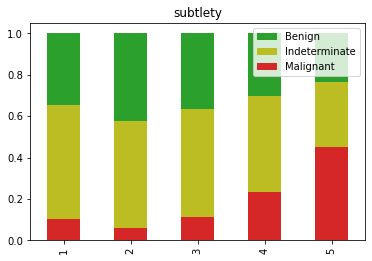

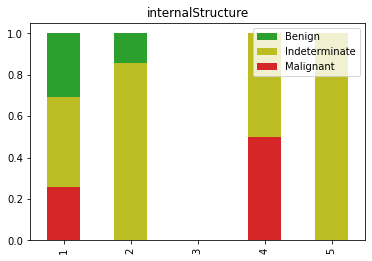

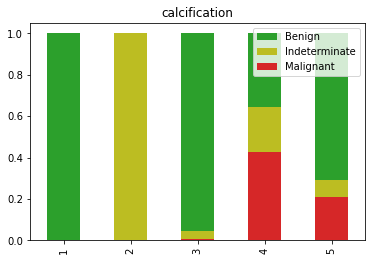

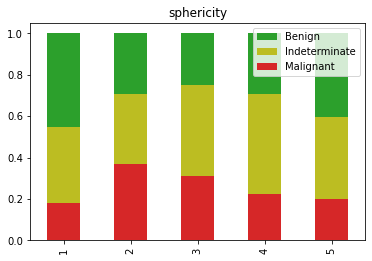

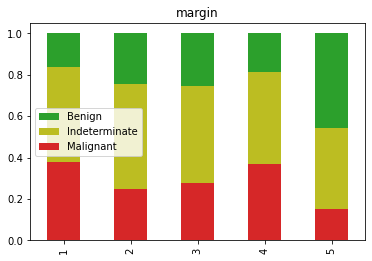

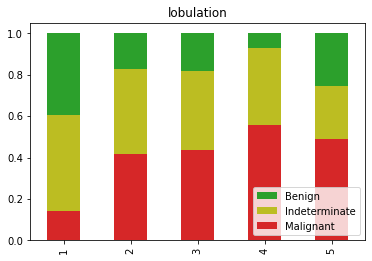

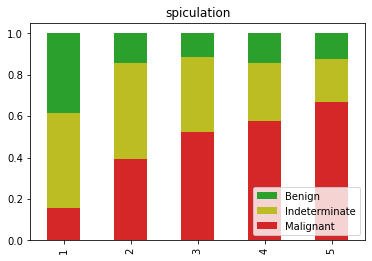

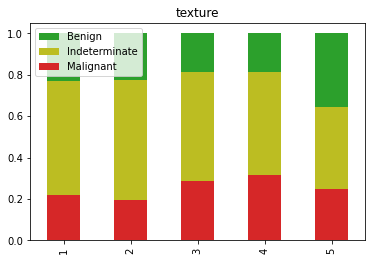

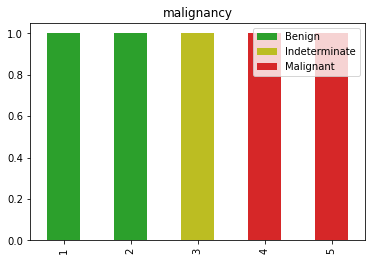

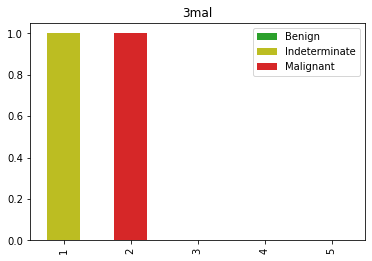

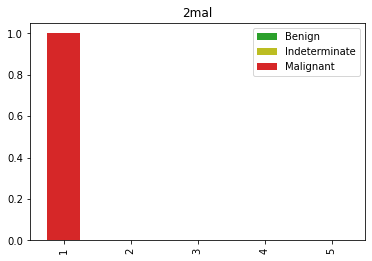

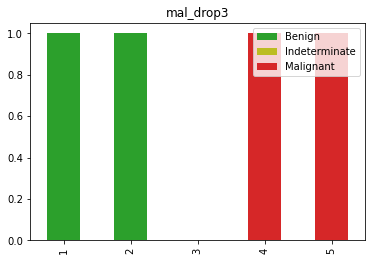

In [73]:
for i in range(len(counts)):
    pd.DataFrame(counts[i], index=[1,2,3,4,5], columns=["Malignant", "Indeterminate", "Benign"]).plot.bar(stacked=True, title=features.columns[i], legend='reverse', color=['tab:red','tab:olive','tab:green'])

array([[<AxesSubplot:title={'center':'subtlety'}>,
        <AxesSubplot:title={'center':'internalStructure'}>,
        <AxesSubplot:title={'center':'calcification'}>],
       [<AxesSubplot:title={'center':'sphericity'}>,
        <AxesSubplot:title={'center':'margin'}>,
        <AxesSubplot:title={'center':'lobulation'}>],
       [<AxesSubplot:title={'center':'spiculation'}>,
        <AxesSubplot:title={'center':'texture'}>,
        <AxesSubplot:title={'center':'malignancy'}>],
       [<AxesSubplot:title={'center':'3mal'}>,
        <AxesSubplot:title={'center':'2mal'}>,
        <AxesSubplot:title={'center':'mal_drop3'}>]], dtype=object)

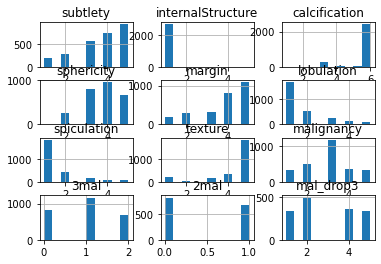

In [8]:
features.hist()

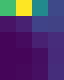

In [54]:
from PIL import Image

matrix_features = ["spiculation", "mal_drop3"]

f0vals = features[matrix_features[0]]
f0vals = np.sort(f0vals[~np.isnan(f0vals)].unique())
f1vals = features[matrix_features[1]]
f1vals = np.sort(f1vals[~np.isnan(f1vals)].unique())

# mode of malignancy
# display_fn = lambda bool_array: statistics.mode(features.loc[bool_array, "mal_drop3"].values) if bool_array.any() else 0

# count
display_fn = lambda bool_array: sum(bool_array)

# color tuples of binary malignant and benign counts (r = malignant, g = benign)
# display_fn = lambda bool_array: (sum(features.loc[bool_array, "2mal"].values == 1), sum(features.loc[bool_array, "2mal"].values == 0), 0)

# binary malignancy proportion
# display_fn = lambda bool_array: sum(features.loc[bool_array, "2mal"].values == 1) / sum(features.loc[bool_array, "2mal"].values > -1)
        
matrix = [[display_fn((features[matrix_features[0]] == f0).values & (features[matrix_features[1]] == f1).values) for f1 in f1vals] for f0 in f0vals]

img_array = (np.minimum(255, np.array(matrix) / np.amax(matrix) * 255)).astype(np.uint8)

# colormap time :)
cm = plt.get_cmap('viridis')

false_color = cm(matrix / np.amax(matrix))

scale_factor = 16

Image.fromarray(img_array).resize((scale_factor * len(f1vals), scale_factor * len(f0vals)), Image.NONE)
Image.fromarray((false_color * 255).astype(np.uint8)).resize((scale_factor * len(f1vals), scale_factor * len(f0vals)), Image.NONE)

In [34]:
train_test = pd.read_csv("../data/lidc_train_test_split_stratified.csv")
subtypes = pd.read_csv("../data/lidc_spic_subgrouped.csv")

In [49]:
sum(subtypes[train_test["dataset"] == "train"]["subgroup"] == "unmarked_malignant")

225

In [42]:
sum(subtypes["subgroup"] == "unmarked_malignant")

282

In [53]:
57/282

0.20212765957446807

In [117]:
df_numeric = df.iloc[:, list(range(22,38)) + list(range(75,123))]
df_numeric["new"] = df_numeric["SuperscribedDiameter"] * df_numeric["ConvexPerimeter"]
df_numeric["spiculation"] = df["spiculation"]
corr = df_numeric.corr(method='spearman')["spiculation"]
corr[(corr > 0.3) | (corr < -0.3)]
# corr["new"]
#df_numeric

C:\Users\efurst1\AppData\Local\Temp\ipykernel_19668\1070356079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric["new"] = df_numeric["SuperscribedDiameter"] * df_numeric["ConvexPerimeter"]
C:\Users\efurst1\AppData\Local\Temp\ipykernel_19668\1070356079.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric["spiculation"] = df["spiculation"]


Area                    0.394289
ConvexArea              0.398820
Perimeter               0.404415
ConvexPerimeter         0.400431
EquivDiameter           0.394289
MajorAxisLength         0.392959
MinorAxisLength         0.390231
SuperscribedDiameter    0.395968
Compactness             0.303402
RadialDistanceSD        0.314300
gaborSD_0_0            -0.324863
gabormean_0_1          -0.317408
gaborSD_0_1            -0.326232
gaborSD_1_1            -0.334626
gabormean_2_0          -0.302467
gaborSD_2_0            -0.333038
gabormean_2_1          -0.320047
gaborSD_2_1            -0.342747
gabormean_3_0          -0.320706
gaborSD_3_0            -0.303539
gabormean_3_1          -0.305042
gabormean_3_2          -0.324454
Energy                 -0.401455
Entropy                 0.401404
new                     0.398539
spiculation             1.000000
Name: spiculation, dtype: float64